# Prodigy Infotech Task-3

## Dataset : Bank_Marketing_Dataset 

Datset Resource :  I had downloaded the dataset from the UCI Machine Learning git repository(https://archive.ics.uci.edu/dataset/222/bank+marketing).

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Here they had given the four datasets.They are 
1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]

2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.

3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs). 

4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).

The smallest datasets are provided to test more computationally demanding machine learning algorithms.

From the above I had analysed the bank_full data because it contains all the information as same as bank_additional_data but less data.simply I can say that I had taken the sample of the data.

In [29]:
# data manipulation
import numpy as np
import pandas as pd

# modeling utilities
from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

In [30]:
#Loading the data
df = pd.read_csv("Bank_Full_data_2.csv")
df.head() #top 5 rows

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target_Variable(y)
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [31]:
#No.of columns and rows present in data
df.shape

(45211, 17)

We have "45211" rows with "17" Columns

In [32]:
#Info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 45211 non-null  int64 
 1   job                 45211 non-null  object
 2   marital             45211 non-null  object
 3   education           45211 non-null  object
 4   default             45211 non-null  object
 5   balance             45211 non-null  int64 
 6   housing             45211 non-null  object
 7   loan                45211 non-null  object
 8   contact             45211 non-null  object
 9   day                 45211 non-null  int64 
 10  month               45211 non-null  object
 11  duration            45211 non-null  int64 
 12  campaign            45211 non-null  int64 
 13  pdays               45211 non-null  int64 
 14  previous            45211 non-null  int64 
 15  poutcome            45211 non-null  object
 16  Target_Variable(y)  45

We have two types of datatypes that are int64 and object types

In [33]:
#Checking for null values
df.isnull().sum()

age                   0
job                   0
marital               0
education             0
default               0
balance               0
housing               0
loan                  0
contact               0
day                   0
month                 0
duration              0
campaign              0
pdays                 0
previous              0
poutcome              0
Target_Variable(y)    0
dtype: int64

Our data doesn't contain any null values.

In [34]:
#Statistics of data
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [35]:
#Datatypes of all columns
df.dtypes

age                    int64
job                   object
marital               object
education             object
default               object
balance                int64
housing               object
loan                  object
contact               object
day                    int64
month                 object
duration               int64
campaign               int64
pdays                  int64
previous               int64
poutcome              object
Target_Variable(y)    object
dtype: object

In [36]:
#Copying the data to a variable dff from df 
dff =df.copy()

In [37]:
#Checking the values in all categorical columns for better understanding
for col in df.select_dtypes(include = 'object' ).columns: #loop starts here by taking the columns which have object type
    print(col) #prints the object type columns
    print(df[col].unique())  #prints the values of each column

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'failure' 'other' 'success']
Target_Variable(y)
['no' 'yes']


#### Feature Engineering 

In [39]:
# Changing the all object type columns to category for label encoding:
for col in df.select_dtypes(include = 'object' ).columns: # loop starts by selecting the object type columns
    df[col] = df[col].astype('category') # here it changes the object type columns as category datatype
    

In [40]:
#Checking the datatypes after changing object to category type
df.dtypes

age                      int64
job                   category
marital               category
education             category
default               category
balance                  int64
housing               category
loan                  category
contact               category
day                      int64
month                 category
duration                 int64
campaign                 int64
pdays                    int64
previous                 int64
poutcome              category
Target_Variable(y)    category
dtype: object

In [41]:
#Copying the data
df1 = df.copy()

In [42]:
#label Encoding
label_encoder = preprocessing.LabelEncoder()

#Encode labels in column
for col in df1.select_dtypes(include = 'category').columns:
    df1[col] = label_encoder.fit_transform(df1[col])

In [43]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target_Variable(y)
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [44]:
#checking the dtypes after changed into int 
df1.dtypes

age                   int64
job                   int32
marital               int32
education             int32
default               int32
balance               int64
housing               int32
loan                  int32
contact               int32
day                   int64
month                 int32
duration              int64
campaign              int64
pdays                 int64
previous              int64
poutcome              int32
Target_Variable(y)    int32
dtype: object

#### Feature Scaling 

In [46]:
#Scaling
#Defining a function for scaling

def feature_scale(scale): # defining a fun
    numerics = ['int16','int32','int64','float16','float32','float64'] #creating a variable that stores all types of int
    new_df=df1.select_dtypes(include=numerics) # storing the numeric datatypes from df1 to new_df
    if scale == 'minmax': #Conditional Statement
        scaler = MinMaxScaler() # if scale is minmax then it uses minmaxscaler()
    else:
        scaler=StandardScaler() #if it is not minmax then it uses standardscaler()
    df_scaled=pd.DataFrame(scaler.fit_transform(new_df.to_numpy()),columns=new_df.columns)#Creating the new df for storing scaled vlues
    return df_scaled #returns the new df that is scaled df

In [47]:
#Applying the function
scale = 'minmax'
scaled_df = feature_scale(scale)
scaled_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target_Variable(y)
0,0.519481,0.363636,0.5,0.666667,0.0,0.092259,1.0,0.0,1.0,0.133333,0.727273,0.053070,0.000000,0.000000,0.000000,1.000000,0.0
1,0.337662,0.818182,1.0,0.333333,0.0,0.073067,1.0,0.0,1.0,0.133333,0.727273,0.030704,0.000000,0.000000,0.000000,1.000000,0.0
2,0.194805,0.181818,0.5,0.333333,0.0,0.072822,1.0,1.0,1.0,0.133333,0.727273,0.015453,0.000000,0.000000,0.000000,1.000000,0.0
3,0.376623,0.090909,0.5,1.000000,0.0,0.086476,1.0,0.0,1.0,0.133333,0.727273,0.018707,0.000000,0.000000,0.000000,1.000000,0.0
4,0.194805,1.000000,1.0,1.000000,0.0,0.072812,0.0,0.0,1.0,0.133333,0.727273,0.040260,0.000000,0.000000,0.000000,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.428571,0.818182,0.5,0.666667,0.0,0.080293,0.0,0.0,0.0,0.533333,0.818182,0.198658,0.032258,0.000000,0.000000,1.000000,1.0
45207,0.688312,0.454545,0.0,0.000000,0.0,0.088501,0.0,0.0,0.0,0.533333,0.818182,0.092721,0.016129,0.000000,0.000000,1.000000,1.0
45208,0.701299,0.454545,0.5,0.333333,0.0,0.124689,0.0,0.0,0.0,0.533333,0.818182,0.229158,0.064516,0.212156,0.010909,0.666667,1.0
45209,0.506494,0.090909,0.5,0.333333,0.0,0.078868,0.0,0.0,0.5,0.533333,0.818182,0.103294,0.048387,0.000000,0.000000,1.000000,0.0


#### Feature Selection : 

In [48]:
# Correlation

correlation = df1.corr()

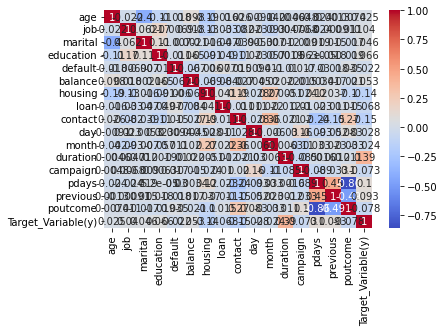

In [49]:
#Heatmap of all  related variables 
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [50]:
# correlation values with the target variable (assuming 'Survived' is the target variable)
corr_with_target = correlation['Target_Variable(y)'].abs().sort_values(ascending=False)

# top features with highest correlation values
top_features = corr_with_target[1:]  # Exclude the target variable itself

# Print the top features and their correlation values
print("Top features with their correlation values:")
print(top_features)

Top features with their correlation values:
duration     0.394521
contact      0.148395
housing      0.139173
pdays        0.103621
previous     0.093236
poutcome     0.077840
campaign     0.073172
loan         0.068185
education    0.066241
balance      0.052838
marital      0.045588
job          0.040438
day          0.028348
age          0.025155
month        0.024471
default      0.022419
Name: Target_Variable(y), dtype: float64


#### EDA

In [53]:
# Categorical data
categorical_features=[feature for feature in dff.columns if ((dff[feature].dtypes=='O') & (feature not in ['Target_Variable(y)']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

#### Univariate Analysis : 

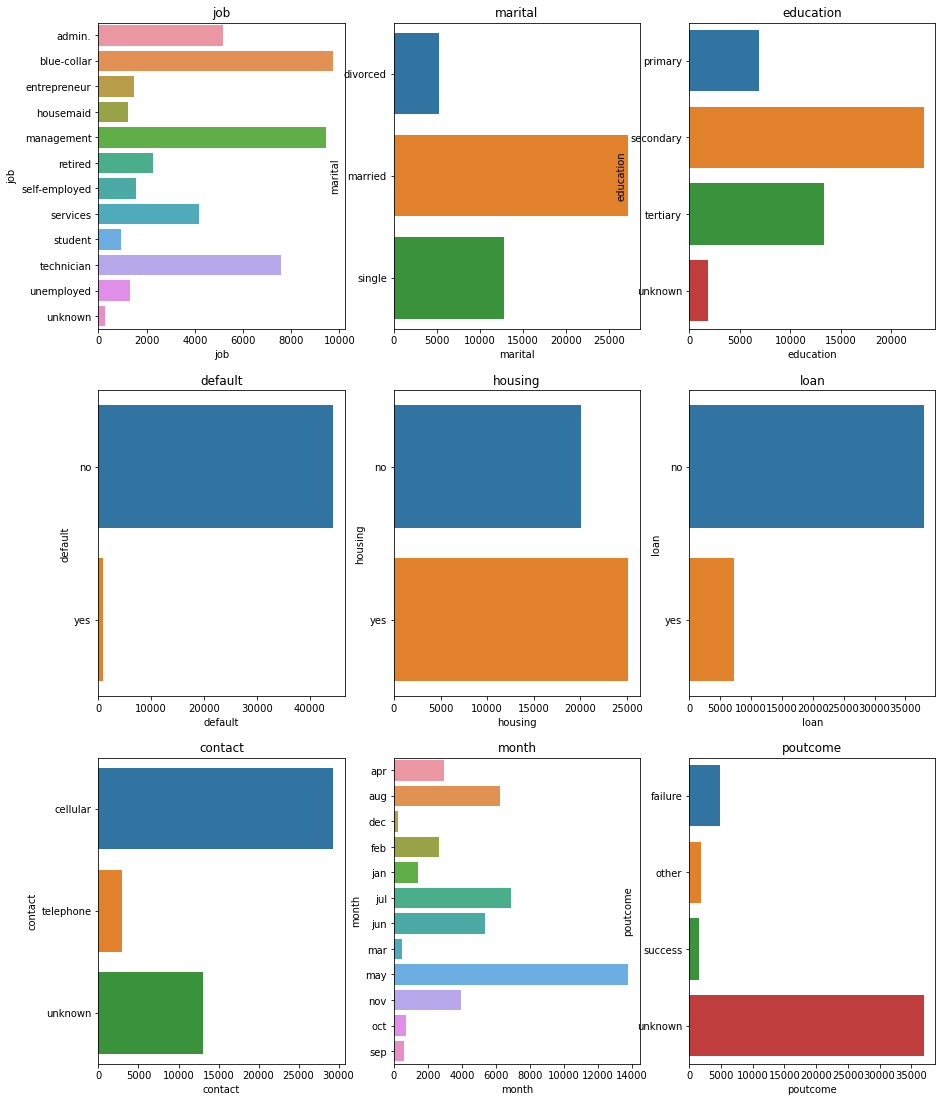

In [54]:
#check count based on categorical features
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

Analysis from above plots :

1)job : The people with bluecollars are highest in number followed by management and technician.

2)Married : married people are more in number followed by single and divorced.

3)Education : Most of the members were completed their secondary education followed by teritiary.

4)default : The people with "no" are more.

5)Housing : The people with house loan are more.

6)loan : People with loan are very less.

7)Conatct : people with cellular are more in number.

8)Month : The may month has more numbers.

9)Poutcome : Unknown are more so we can't conclude here.

#### Bivariate Analysis : 

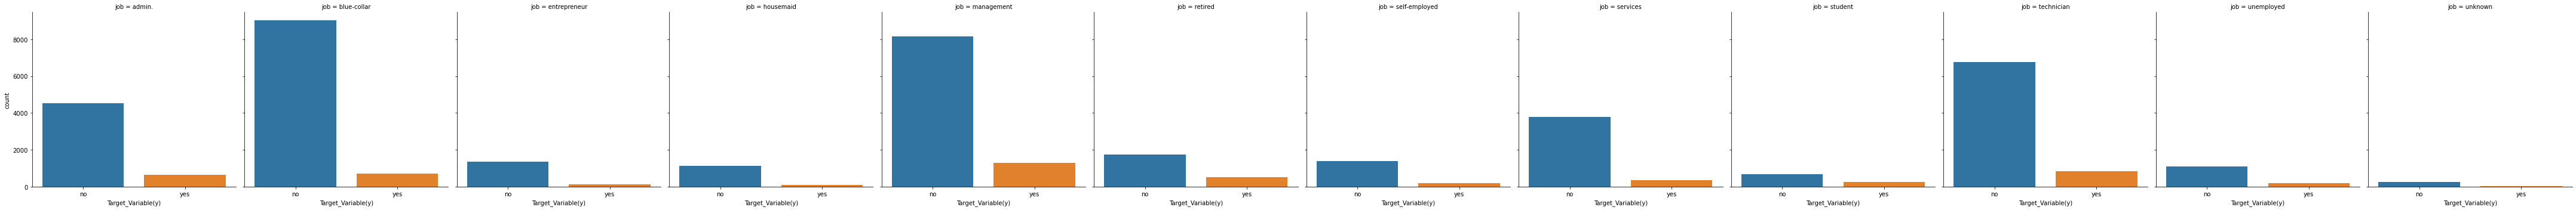

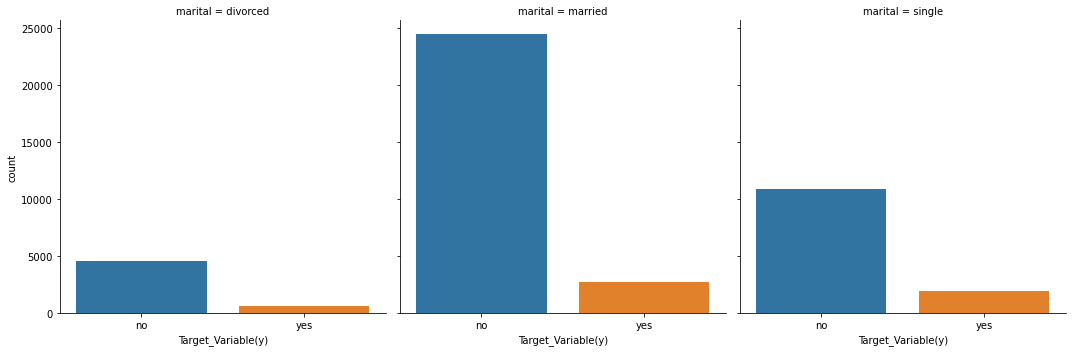

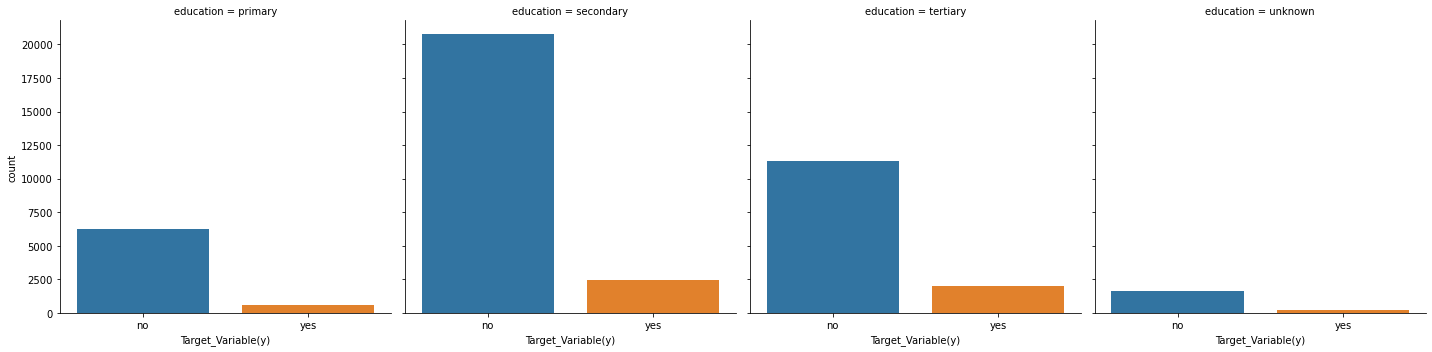

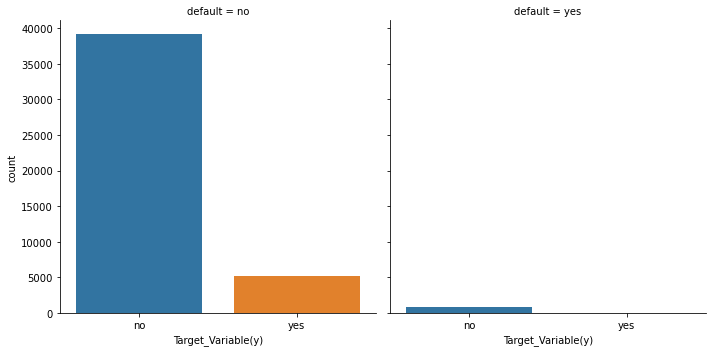

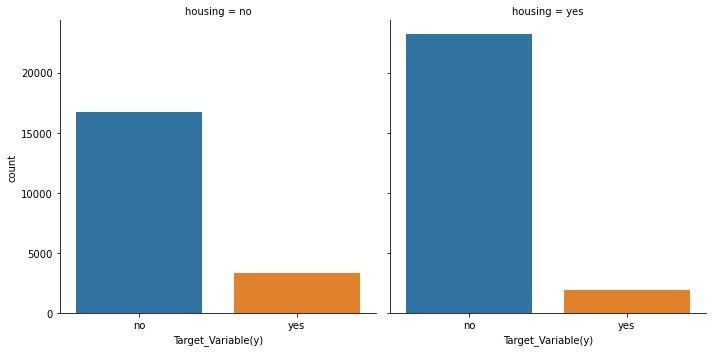

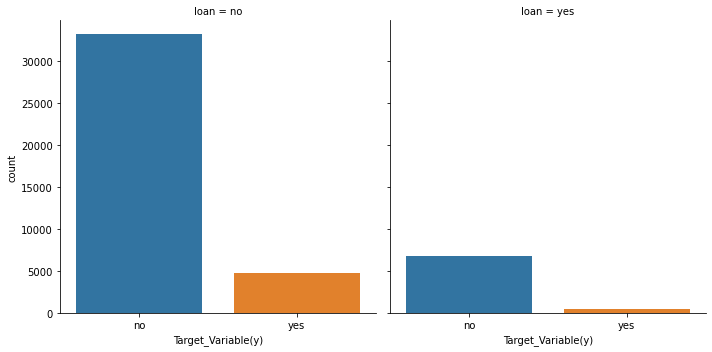

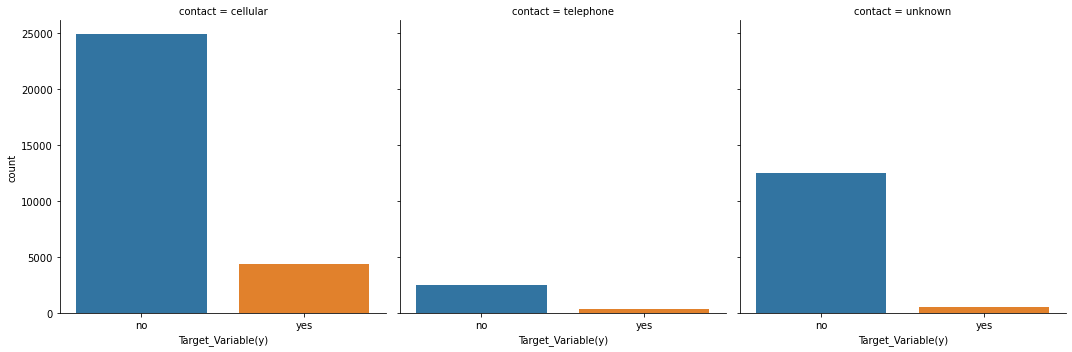

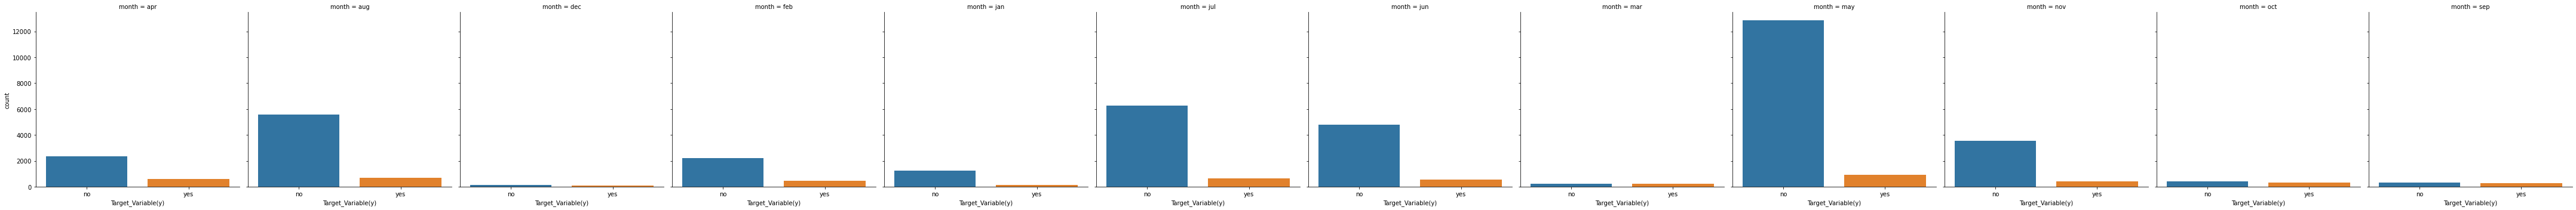

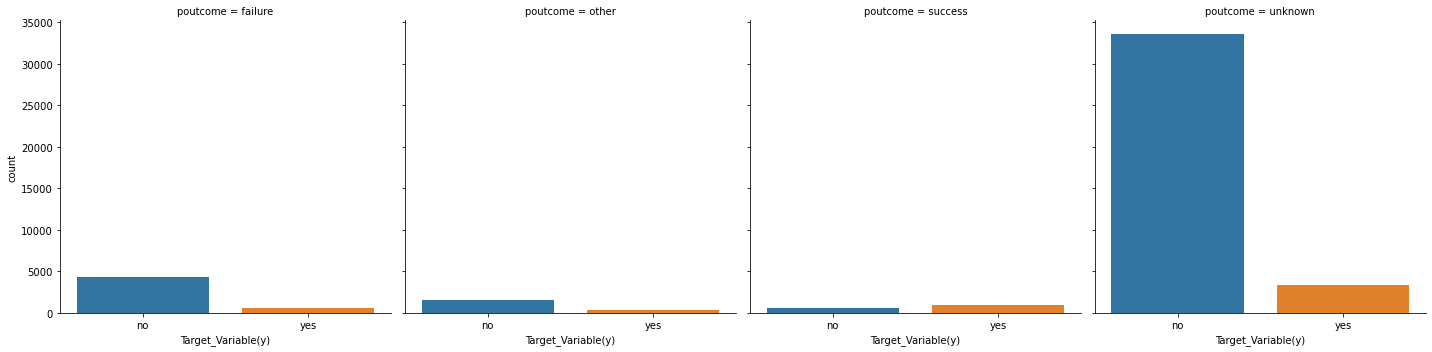

In [55]:
#check target label split over categorical features
#Find out the relationship between categorical variable and dependent variable
for categorical_feature in categorical_features:
    sns.catplot(x='Target_Variable(y)', col=categorical_feature, kind='count', data= df)
plt.show()

Analysis of above plots :

from the above plots we can observe that in every fileds their are less members who had subscribed the term deposit and there are many people who had not subscribed so we need to focus on them.


In [57]:
# Selecting the features for modelling :
X = scaled_df[['duration','contact','housing','pdays','previous','campaign']]#Features that are highly replated to target.
Y = df['Target_Variable(y)']   # Traget Variable    

In [58]:
#Shape of x 
X.shape

(45211, 6)

In [ ]:
Y.shape#Shape of x 

In [59]:
#Spliiting the data into train and test on the raio of 7:3:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=30)

In [60]:
# shapes of x_train,x_test,y_train,y_test
print("Shape of x_train-->",x_train.shape)
print("Shape of y_train-->",y_train.shape)
print("Shape of x_test-->",x_test.shape)
print("Shape of y_test-->",y_test.shape)

Shape of x_train--> (31647, 6)
Shape of y_train--> (31647,)
Shape of x_test--> (13564, 6)
Shape of y_test--> (13564,)


#### Tuning the parameters : 

In [63]:
# List of values to try for max_depth:
from sklearn.tree import DecisionTreeClassifier
max_depth_range = list(range(1, 6))# List to store the accuracy for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    clf.fit(x_train, y_train)    
    score = clf.score(x_test, y_test)
    accuracy.append(score)

In [64]:
# Accuracy of all the models 
accuracy

[0.8860218224712474,
 0.8903715718077263,
 0.8906664700678266,
 0.891108817457977,
 0.8937629017988794]

From the above Models we can see that the model with max_depth 4 had given best result compared to others.so,in coming step we are going to build a model with max_depth 4.

#### Modelling 

Here I'm using the Decision tree calssifier as per the given task requirement.

In [66]:
#Model Building
# Create Decision Tree classifer object
classifier = DecisionTreeClassifier(max_depth=4,random_state=0)

# Train Decision Tree Classifer
classifier.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = classifier.predict(x_test)

In [69]:
# Confusiion Matrix 
confusion_matrix(y_test, y_pred)  

array([[11559,   459],
       [ 1018,   528]], dtype=int64)

True Positive (TP): 11559

These are the cases where the model correctly predicted that customers would make a deposit.
False Positive (FP): 459

These are the cases where the model incorrectly predicted that customers would make a deposit (Type I error).
False Negative (FN): 1018

These are the cases where the model incorrectly predicted that customers would not make a deposit (Type II error).
True Negative (TN): 528

These are the cases where the model correctly predicted that customers would not make a deposit.